In [1]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

### Costs

[User agreement](https://www.veoride.com/user-agreement/)

Cosmo/Astro: $1 to unlock, $0.35 per minute.

Cosmo speed: [8, 17] mph, range of 45 miles [cosmo](https://shop.veoride.com/products/cosmo-s)
Astro speed: [6, 15] mph, range of 43 miles [astro](https://www.veoride.com/astro/)


Taxes:
Sales tax: 9% of total in CU

Rental fees/charges [user-agreement](https://www.veoride.com/user-agreement/#:~:text=3.5.%20MAXIMUM%20RENTAL%20TIME%20AND%20CHARGES.)
Continuous rental time: 48 hours 
Maximum daily charge: $48 or accumulated rental, whichever is less.
Potential Service fee: $30 for rentals in excess of 24 hours.


In [68]:
cost = lambda t: 1.09 * (np.minimum((1 + (0.35 * t)), 48)) + ((t > 24)*30)

time = np.geomspace(start=1, stop=48*60, num=10, dtype=int)


print(cost(time))
print(time)

[ 1.4715  1.853   2.9975  6.431  44.061  62.7545 82.32   82.32   82.32
 82.32  ]
[   1    2    5   14   34   83  202  490 1188 2880]


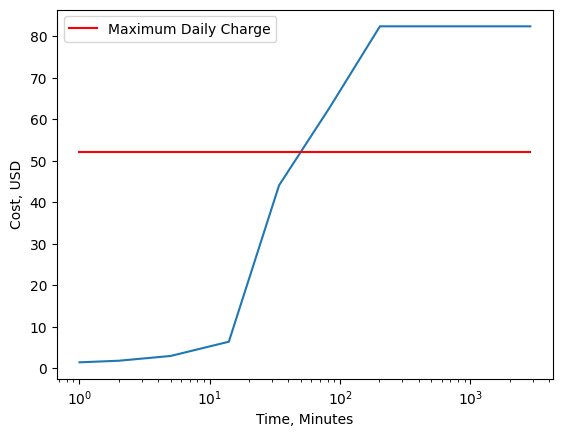

In [69]:
fig, ax = plt.subplots()

ax.plot(time, cost(time))

ax.set_xticks(time)
ax.set_xscale('log')
ax.set_xlabel('Time, Minutes')
ax.set_ylabel('Cost, USD')

max_charge = ax.plot(time, np.full_like(time, 48*1.09), color='red', label='Maximum Daily Charge')

ax.legend()